In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-data/housing.csv


# Read the CSV File

In [2]:
housing = pd.read_csv("../input/california-housing-data/housing.csv")
print(housing.shape)
housing.head()

(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Exlore Information About Your Data

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# Inspect Non Numeric Column

In [4]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

# Some Statistical Info About the Data

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Plot the Distribution of Each Attribute(Column)

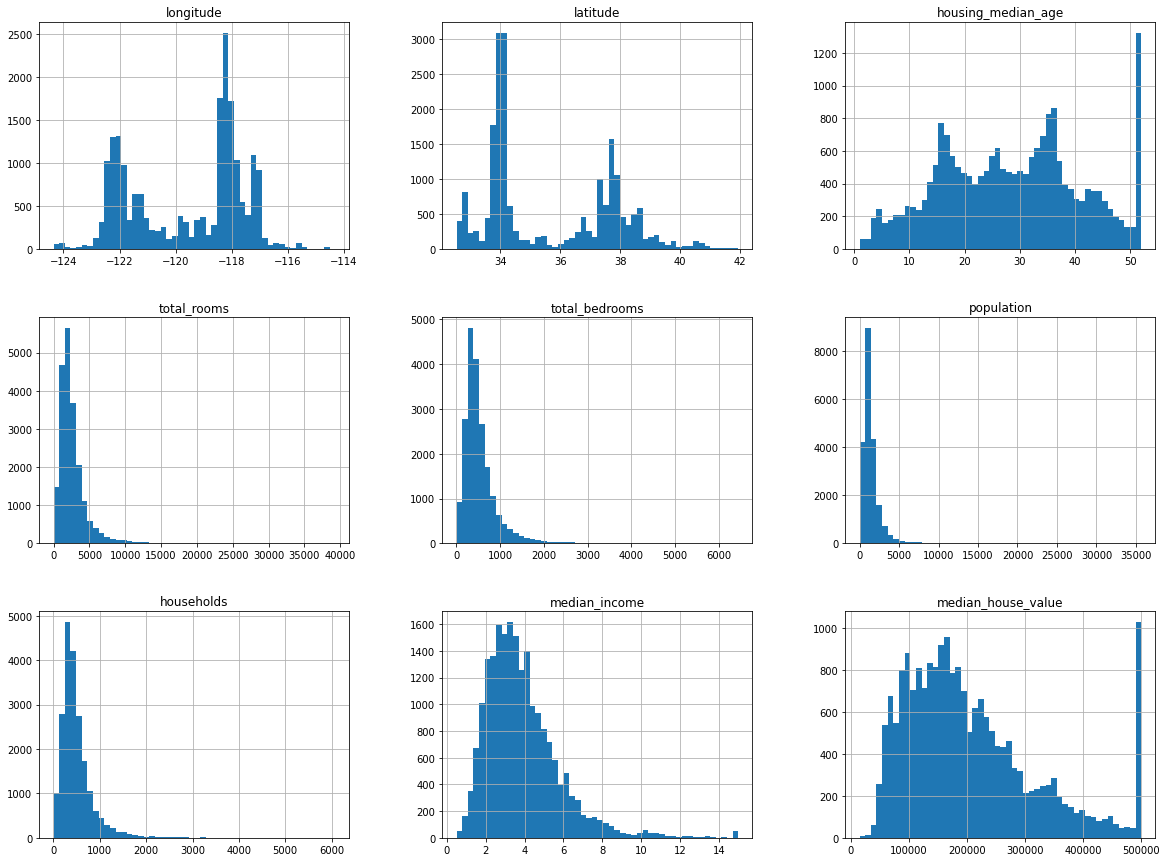

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))
plt.show()

# Split the Data
The training and testing data need to represent the entire data correctly. We will use a new feature based on the median income to stratify the data.

<AxesSubplot:>

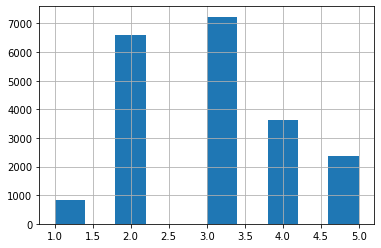

In [7]:
housing['income_cat'] = pd.cut(housing.median_income, bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])
housing.income_cat.hist()

In [8]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42, stratify=housing.income_cat)

In [9]:
housing = train_set.drop('income_cat', axis=1)

# Visualize the Data


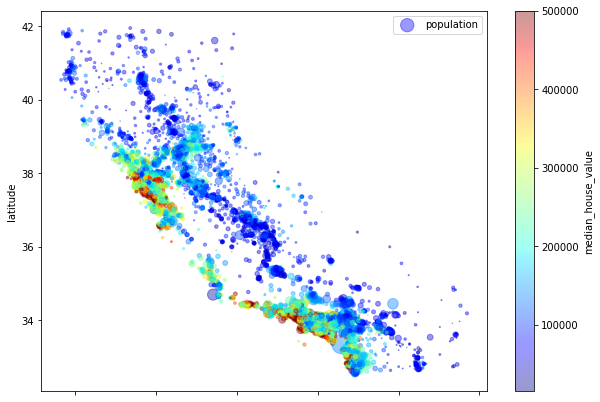

In [10]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, figsize=(10, 7), c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True, s=housing.population/100, label='population')
plt.legend()

# Check the Correlation Between the Label and Every Attribute

In [11]:
corr_matrix = housing.corr()
corr_matrix.median_house_value.sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

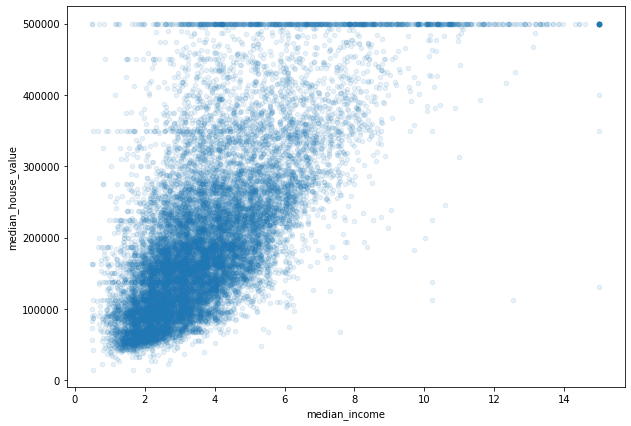

In [12]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1, figsize=(10, 7))

# Engineer New Fearures That May Be More Useful

In [13]:
housing["rooms_per_household"] = housing.total_rooms/housing.households
housing["bedrooms_per_room"] = housing.total_bedrooms/housing.total_rooms
housing["population_per_household"]=housing.population/housing.households

In [14]:
corr_matrix = housing.corr()
corr_matrix.median_house_value.sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

# Separate Labels and Features

In [15]:
housing = train_set.drop(['median_house_value', 'income_cat'], axis=1)
housing_labels = train_set.median_house_value.copy()

# Separate Numerical and Categorical Features

In [16]:
housing_num = housing.drop('ocean_proximity', axis=1)
housing_cat = housing[['ocean_proximity']].copy()

In [17]:
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

# Construct The Pipeline

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [19]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

In [20]:
from sklearn.compose import ColumnTransformer
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

# Prepare the Data

In [21]:
housing_prepared = full_pipeline.fit_transform(housing)

# Train Some Models

In [22]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [23]:
from sklearn.metrics import mean_squared_error as MSE
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = MSE(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse #Underfitting

69050.56219504567

In [24]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [25]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = MSE(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse #Overfitting

0.0

In [26]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [27]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = MSE(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_mse 

335069857.3412425

# Use K-Fold Cross Validation 

In [28]:
from sklearn.model_selection import cross_val_score
tree_scores = cross_val_score(tree_reg, housing_prepared, housing_labels, cv=10, scoring='neg_mean_squared_error')
tree_rmse_scores = np.sqrt(-tree_scores)
print(tree_rmse_scores, tree_rmse_scores.mean(), tree_rmse_scores.std())

[70427.04382189 69975.87887882 65185.85653613 69264.4226094
 68096.65884351 67181.07006148 72074.43409889 70203.16356716
 68151.46687067 71555.2295139 ] 69211.52248018506 1985.7610894350653


In [29]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, cv=10, scoring='neg_mean_squared_error')
lin_rmse_scores = np.sqrt(-lin_scores)
print(lin_rmse_scores, lin_rmse_scores.mean(), lin_rmse_scores.std())

[72229.03469752 65318.2240289  67706.39604745 69368.53738998
 66767.61061621 73003.75273869 70522.24414582 69440.77896541
 66930.32945876 70756.31946074] 69204.32275494763 2372.070791055922


In [30]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, cv=10, scoring='neg_mean_squared_error')
forest_rmse_scores = np.sqrt(-forest_scores)
print(forest_rmse_scores, forest_rmse_scores.mean(), forest_rmse_scores.std())

[50715.31024232 49205.25597504 46210.39581328 50494.50902468
 47417.97919307 49379.91966627 51811.26652312 48766.21454373
 47362.57382437 53303.51126868] 49466.69360745611 2064.6601745546163


# Tune Your Model

In [32]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}
]

In [33]:
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [34]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [37]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63569.26412916192 {'max_features': 2, 'n_estimators': 3}
55554.34849659902 {'max_features': 2, 'n_estimators': 10}
52512.854639997124 {'max_features': 2, 'n_estimators': 30}
59891.12479355991 {'max_features': 4, 'n_estimators': 3}
52568.42010876817 {'max_features': 4, 'n_estimators': 10}
50419.82784443758 {'max_features': 4, 'n_estimators': 30}
59361.17648674015 {'max_features': 6, 'n_estimators': 3}
52254.55574255259 {'max_features': 6, 'n_estimators': 10}
49925.18137375705 {'max_features': 6, 'n_estimators': 30}
58257.28943330483 {'max_features': 8, 'n_estimators': 3}
52060.685768846924 {'max_features': 8, 'n_estimators': 10}
50223.176066959146 {'max_features': 8, 'n_estimators': 30}


In [38]:
final_model = grid_search.best_estimator_

# Test the Model

In [41]:
X_test = test_set.drop(['median_house_value', 'income_cat'], axis=1)
y_test = test_set.median_house_value.copy()

In [45]:
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = MSE(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47407.646373773525

In [46]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([45448.45379841, 49289.02430294])